# Heart Diseases Project

This dataset taken from Kaggle contains the details of various patients who came for checkup due to heart problems. Our goal is to predict if they do have a heart disease or not. The various fields in the data set are- 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/My Drive/heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

In [7]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


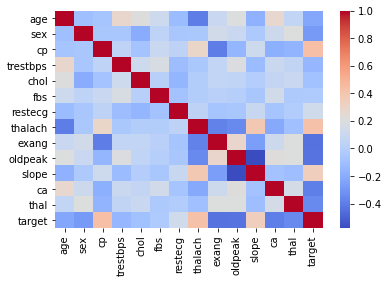

In [8]:

sns.heatmap(data=data.corr(),cmap='coolwarm')

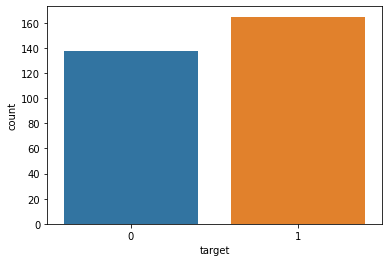

In [9]:
sns.countplot(x='target',data=data)

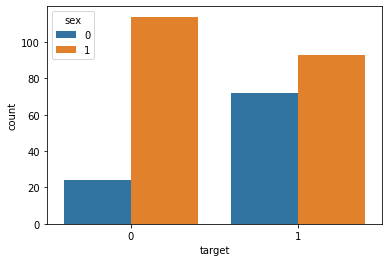

In [10]:
sns.countplot(x='target',data=data,hue='sex')

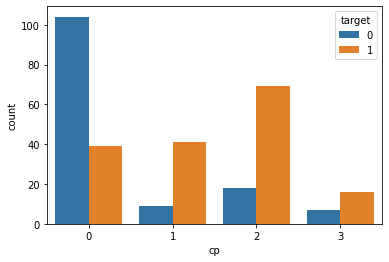

In [12]:
sns.countplot(x='cp',data=data,hue='target')

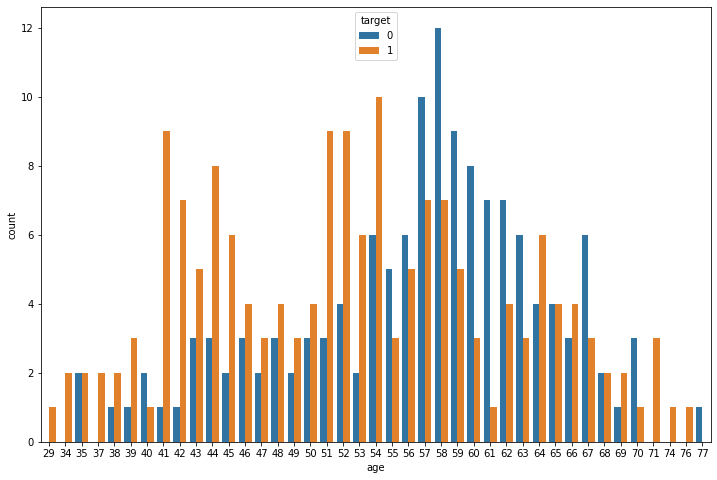

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x='age',data=data,hue='target')

# Test Train Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=data.drop('target',axis=1)
y=data['target'];

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [117]:
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5, random_state=42)

# Creating the Model

We will check on various model and then select the best one among them to get the results on the test set. The models will be compared on the basis of their accuracy on the Validation set.

## 1. Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
pred = lr.predict(X_val)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.90      0.82      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [85]:
print(confusion_matrix(y_val,pred))

[[25  3]
 [ 6 27]]


## 2. Random Forrest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf=RandomForestClassifier()

In [88]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
pred2=rf.predict(X_val)

In [90]:
print(confusion_matrix(y_val,pred2))

[[25  3]
 [ 5 28]]


In [91]:
print(classification_report(y_val,pred2))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.85      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## 3. Neural Network
We will make a neural network and compare it's accuracy with the above two algothims. As the data set is small with only 13 features, the model will have only 2 hidden layers with decreasing number of neurons.

Data Scaling

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler=MinMaxScaler()

In [94]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [95]:
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)

Making the model

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
X_train.shape

(181, 13)

In [105]:
model=Sequential()
#input layer
model.add(Dense(units=13,activation='relu'))
#hidden layer 1
model.add(Dense(units=9,activation='relu'))
#hidden layer 2
model.add(Dense(units=5,activation='relu'))
#output layer
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer ='adam')

In [106]:
early_stop=EarlyStopping(mode='min',verbose=1,patience=5)

In [107]:
model.fit(x=X_train,y=y_train,epochs=150,validation_data=(X_val,y_val),verbose=1,callbacks=[early_stop])

Epoch 1/150
6/6 [==============================] - 0s 20ms/step - loss: 0.6882 - val_loss: 0.6753
Epoch 2/150
6/6 [==============================] - 0s 9ms/step - loss: 0.6834 - val_loss: 0.6695
Epoch 3/150
6/6 [==============================] - 0s 9ms/step - loss: 0.6802 - val_loss: 0.6644
Epoch 4/150
6/6 [==============================] - 0s 10ms/step - loss: 0.6773 - val_loss: 0.6600
Epoch 5/150
6/6 [==============================] - 0s 9ms/step - loss: 0.6741 - val_loss: 0.6558
Epoch 6/150
6/6 [==============================] - 0s 10ms/step - loss: 0.6711 - val_loss: 0.6517
Epoch 7/150
6/6 [==============================] - 0s 9ms/step - loss: 0.6679 - val_loss: 0.6477
Epoch 8/150
6/6 [==============================] - 0s 10ms/step - loss: 0.6647 - val_loss: 0.6436
Epoch 9/150
6/6 [==============================] - 0s 8ms/step - loss: 0.6608 - val_loss: 0.6380
Epoch 10/150
6/6 [==============================] - 0s 9ms/step - loss: 0.6562 - val_loss: 0.6316
Epoch 11/150
6/6 [=======

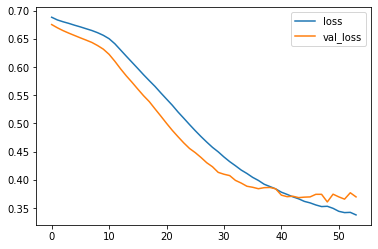

In [108]:
model_loss =pd.DataFrame(model.history.history)
model_loss.plot()

In [109]:
pred3=model.predict_classes(X_val)

In [110]:
print(classification_report(y_val,pred3))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.93      0.79      0.85        33

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [111]:
print(confusion_matrix(y_val,pred3))

[[26  2]
 [ 7 26]]


# Comparison Of Models

On comparing the classification reports and the confusion matrix of all the models, the Random Forest is better than others as it correctly predicts one validation case more than others.
As all the models are similiar, we will be using the Random Forest to evaluate the test set.

# Evaluation of Test set

In [124]:
predictions=rf.predict(X_test)

In [125]:
print(confusion_matrix(y_test,predictions))

[[18  6]
 [ 5 32]]


In [126]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.84      0.86      0.85        37

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



The model gives 82% accuracy, which is pretty good considering we only trained it on 60% of the total data and the dataset we have got is very small. 

